In [19]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img
import matplotlib.pyplot as plt
import string

In [20]:
# Load the dataset from the specified path in Google Drive
file_path = 'sign_mnist_train.csv'
train_df = pd.read_csv(file_path)
test_df = pd.read_csv(file_path)
train_df = train_df[:math.floor(0.7*len(train_df))]
test_df = test_df[math.ceil(0.7*len(train_df)):]
# Display the first few rows of the training dataset
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [21]:
X_train, y_train = np.array(train_df.iloc[:, 1:]).reshape(-1, 28, 28).astype('float64'), np.array(train_df.label).astype('float64')
X_test, y_test = np.array(test_df.iloc[:, 1:]).reshape(-1, 28, 28).astype('float64'), np.array(test_df.label).astype('float64')

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19218, 28, 28) (19218,)
(14002, 28, 28) (14002,)


In [22]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2)

train_generator = train_datagen.flow(x=np.expand_dims(X_train, axis=-1), y=y_train,
                  batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow(x=np.expand_dims(X_test, axis=-1), y=y_test,
                  batch_size=32)

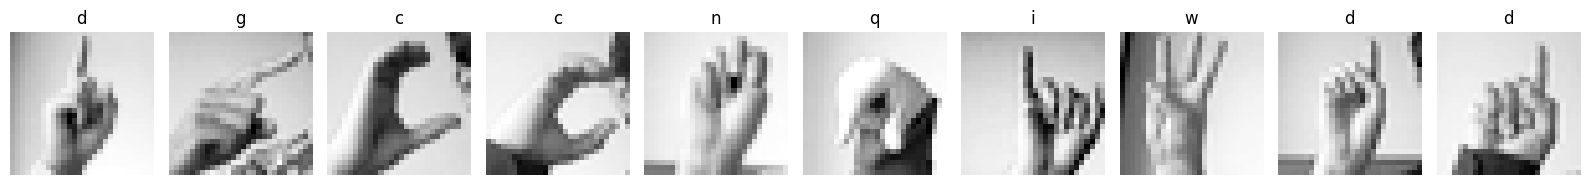

In [23]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(X_train, y_train)

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

tf.random.set_seed(1234)

model = tf.keras.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(26, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 26)                  │           6,682 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 216,538 (845.85 KB)

 Trainable params: 216,538 (845.85 KB)

 Non-trainable params: 0 (0.00 B)

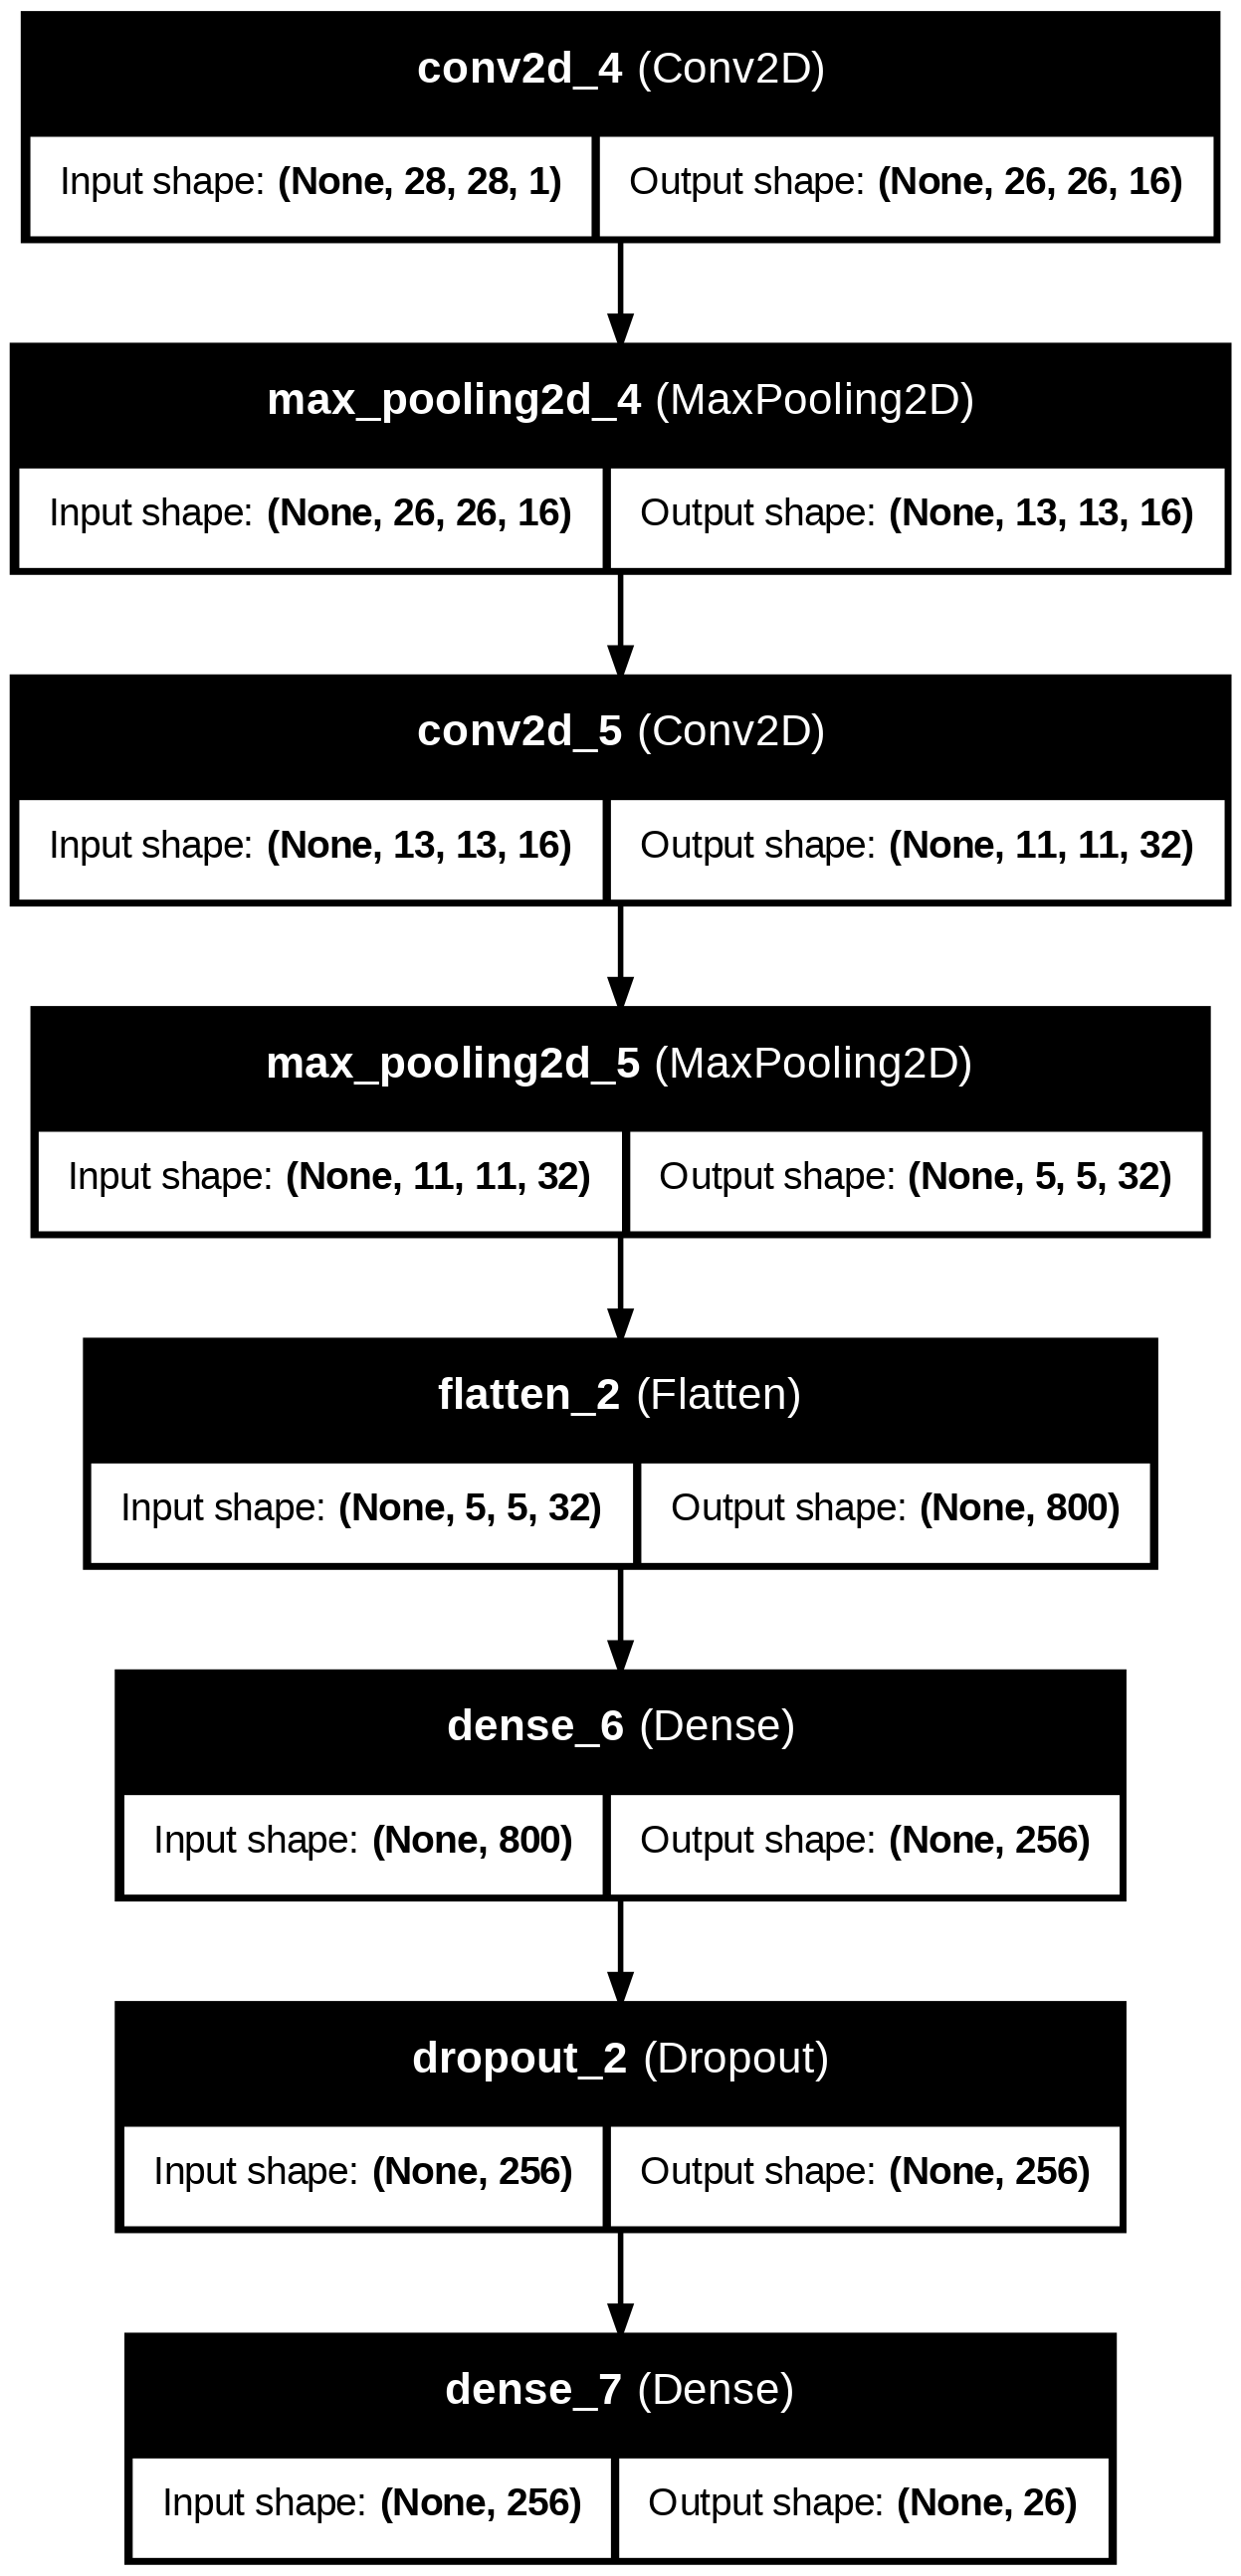

In [25]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your defined CNN model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [26]:
history = model.fit(train_generator, validation_data=test_generator, epochs=10)

Epoch 1/10
  3/601 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.0625 - loss: 3.2779

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


601/601 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.1277 - loss: 2.9223 - val_accuracy: 0.6578 - val_loss: 1.2369
Epoch 2/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.4504 - loss: 1.7381 - val_accuracy: 0.8224 - val_loss: 0.6129
Epoch 3/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6138 - loss: 1.1976 - val_accuracy: 0.9032 - val_loss: 0.3897
Epoch 4/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.7040 - loss: 0.9054 - val_accuracy: 0.9131 - val_loss: 0.3088
Epoch 5/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.7548 - loss: 0.7298 - val_accuracy: 0.9469 - val_loss: 0.2043
Epoch 6/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.7832 - loss: 0.6304 - val_accuracy: 0.9635 - val_loss: 0.1436
Epoch 7/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.8202 - loss: 0.5432 - val_accuracy: 0.9709 - val_loss: 0.1173
Epoch 8/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.8512 - loss: 0.4591 - val_accurac

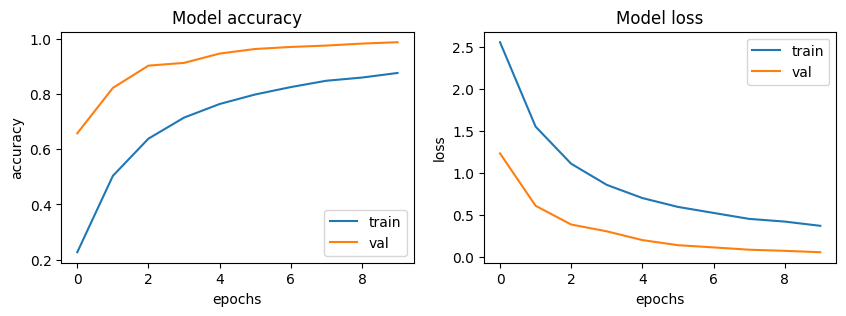

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import math
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_train.csv')

train_df = train_df[:math.floor(0.7*len(train_df))]
test_df = test_df[math.ceil(0.7*len(train_df)):]

# Extract features and labels
X_train = np.array(train_df.iloc[:, 1:]).reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = np.array(train_df['label']).astype('float32')
X_test = np.array(test_df.iloc[:, 1:]).reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_test = np.array(test_df['label']).astype('float32')

# Resize images to (128, 128, 3)
X_train_resized = tf.image.resize(X_train.repeat(3, axis=-1), [128, 128])
X_test_resized = tf.image.resize(X_test.repeat(3, axis=-1), [128, 128])

# Data generators
train_datagen = ImageDataGenerator(
    zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True
)
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train_resized, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test_resized, y_test, batch_size=32)


In [5]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load ResNet50 with pretrained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
output = Dense(26, activation='softmax')(x)

resnet_model = Model(inputs=base_model.input, outputs=output)
resnet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
history_resnet = resnet_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=1
)

601/601 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0481 - loss: 3.1831

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


601/601 ━━━━━━━━━━━━━━━━━━━━ 1941s 3s/step - accuracy: 0.0481 - loss: 3.1831 - val_accuracy: 0.0541 - val_loss: 3.1563


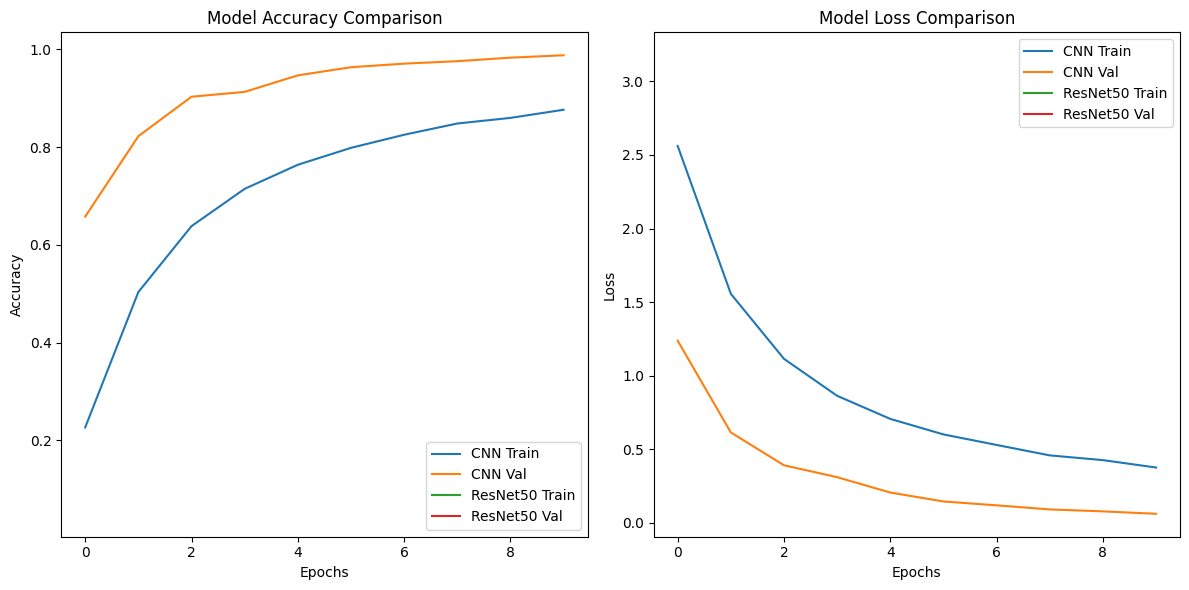

In [28]:
import matplotlib.pyplot as plt

def plot_comparison(history1, history2, labels):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    for i, metric in enumerate(['accuracy', 'loss']):
        axes[i].plot(history1.history[metric], label=f'{labels[0]} Train')
        axes[i].plot(history1.history[f'val_{metric}'], label=f'{labels[0]} Val')
        axes[i].plot(history2.history[metric], label=f'{labels[1]} Train')
        axes[i].plot(history2.history[f'val_{metric}'], label=f'{labels[1]} Val')
        axes[i].set_title(f'Model {metric.capitalize()} Comparison')
        axes[i].set_xlabel('Epochs')
        axes[i].set_ylabel(metric.capitalize())
        axes[i].legend()
    plt.tight_layout()
    plt.show()

plot_comparison(history, history_resnet, ['CNN', 'ResNet50'])
